# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)





In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Classes/PRML/Assignment2/


/content/drive/MyDrive/Classes/PRML/Assignment2



**Cell type : TextRead**

Problem 4: Life in Lower Dimensions

You are provided with a [dataset](https://drive.google.com/file/d/1wOp8K9BS8Ncmjz7aP8RdqukqkGNSwK4i/view?usp=drive_link) of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA clustering the images in this reduced space.

Run the PCA algorithm on the given dataset. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.

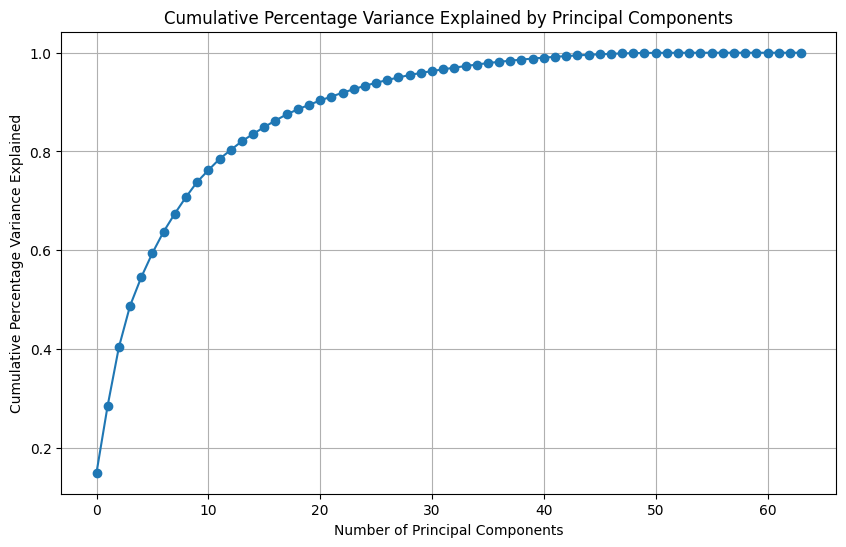

Num Principal components with variance describing more than 90% is 21


In [5]:
# Cell type : CodeWrite
# write the function for PCA clustering here.
data = np.load('Data.npz')
lst = data.files
for item in lst:
    Data = data[item]

def PCA(Data):
    """ Computes the likelihood score of a data point with respect to a given class
    given the class' mean and covariance matrix

    Arguments:
    Data: Dataset



    Returns:
    numPCs: number of principal components that contribute to 90% of the varaince in the dataset.

    """
    mean = np.mean(Data, axis=0)
    centered_data = Data - mean
    covariance_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # sorted_indices = np.argsort(eigenvalues)[::-1]
    # eigenvalues = eigenvalues[sorted_indices]
    # eigenvectors = eigenvectors[:, sorted_indices]

    cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    numPCs = np.argmax(cumulative_variance >= 0.9) + 1

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variance, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Percentage Variance Explained')
    plt.title('Cumulative Percentage Variance Explained by Principal Components')
    plt.grid(True)
    plt.show()

    return numPCs

print('Num Principal components with variance describing more than 90% is',PCA(Data))

4b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.

In [8]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.

def pca_evd(A, num_components = 2):
    mean_A = np.mean(A,axis = 0)
    centered_A = A - mean_A
    cov_matrix = np.cov(centered_A, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    projection_matrix = eigenvectors[:, :num_components]
    projected_A = centered_A.dot(projection_matrix)
    reconstructed_A = projected_A.dot(projection_matrix.T) + mean_A
    return projected_A,reconstructed_A

def svd_flip(u, v, u_based_decision=True):
    if u_based_decision:
        max_abs_cols = np.argmax(np.abs(u), axis=0)
        signs = np.sign(u[max_abs_cols, range(u.shape[1])])
        u *= signs
        v *= signs[:, np.newaxis]
    else:
        # rows of v, columns of u
        max_abs_rows = np.argmax(np.abs(v), axis=1)
        signs = np.sign(v[range(v.shape[0]), max_abs_rows])
        u *= signs
        v *= signs[:, np.newaxis]
    return u, v

def pca_svd(A,num_components = 2):
    mean_A = np.mean(A,axis = 0)
    centered_A = A - mean_A
    U, S, V = np.linalg.svd(centered_A, full_matrices=False)
    U,V = svd_flip(U,V)
    projected_A = np.dot(centered_A, V[:num_components].T)
    reconstructed_A = np.dot(projected_A, V[:num_components]) + mean_A
    return projected_A,reconstructed_A

def mse(A,B):
    return np.square(np.subtract(A, B)).mean()

if __name__ == '__main__':
    for num_components in [2,4,8,16]:
        new_Data,rec_Data = pca_svd(Data,num_components)
        print("MSE of The original vs Th reconstructed one is:",mse(Data,rec_Data))

MSE of The original vs Th reconstructed one is: 13.421012200761453
MSE of The original vs Th reconstructed one is: 9.62798640712921
MSE of The original vs Th reconstructed one is: 6.121792751796509
MSE of The original vs Th reconstructed one is: 2.827182863396541


#### Just Some basic analysis and insights about what I had found to be confusing enough with a some description while implementing it, Hope that you could mail me some of your insights and corrections while checking.

# Dummy Data as of question no-2

In [10]:
data = np.array([
    [5.51, 5.35],
    [20.82, 24.03],
    [-0.77, -0.57],
    [19.30, 19.38],
    [14.24, 12.77],
    [9.74, 9.68],
    [11.59, 12.06],
    [-6.08, -5.22]
])

# data = np.hstack([data,3.5*np.ones((data.shape[0],1))])
# data

## Analysis 1:
(Let's just forget about the reconstruction and projection for a moment and look into the eigen vectors and values)

In [20]:
A = data.copy()
num_components = 2

mean_A = np.mean(A,axis = 0)
centered_A = A - mean_A
cov_matrix = np.cov(centered_A, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

projection_matrix = eigenvectors[:, :num_components]
projected_A = centered_A.dot(projection_matrix)
reconstructed_A = projected_A.dot(projection_matrix.T) + mean_A

print('Eigen values:',eigenvalues)
print('Eigen vectors',*[i for i in eigenvectors])
print()

print('Projected Values\n',projected_A)
print('Reconstructed Values\n',reconstructed_A)
print('Original one\n',data)
print('Reconstruction MSE:',np.sqrt(np.square(A - reconstructed_A)).mean())

Eigen values: [  0.81663462 181.45636359]
Eigen vectors [-0.71990351 -0.69407416] [ 0.69407416 -0.71990351]

Projected Values
 [[-2.84876608e-01  5.74698481e+00]
 [ 1.65870609e+00 -1.83270881e+01]
 [ 1.27198361e-01  1.43675993e+01]
 [-4.74485440e-01 -1.39245441e+01]
 [-1.41960392e+00 -5.65396664e+00]
 [-3.24727310e-01 -3.06131078e-01]
 [-4.65228708e-03 -3.30353862e+00]
 [ 7.22441116e-01  2.14006844e+01]]
Reconstructed Values
 [[ 5.51  5.35]
 [20.82 24.03]
 [-0.77 -0.57]
 [19.3  19.38]
 [14.24 12.77]
 [ 9.74  9.68]
 [11.59 12.06]
 [-6.08 -5.22]]
Original one
 [[ 5.51  5.35]
 [20.82 24.03]
 [-0.77 -0.57]
 [19.3  19.38]
 [14.24 12.77]
 [ 9.74  9.68]
 [11.59 12.06]
 [-6.08 -5.22]]
Reconstruction MSE: 2.1510571102112408e-16


# Analysis 2:

In [18]:
A = data.copy()
num_components = 2

mean_A = np.mean(A,axis = 0)
centered_A = A - mean_A
U, S, V = np.linalg.svd(centered_A, full_matrices=False)
# U,V = svd_flip(U,V)
projected_A = np.dot(centered_A, V[:num_components].T)
reconstructed_A = np.dot(projected_A, V[:num_components]) + mean_A

print('Singular values:',S)
print('Rotation V',V[0],V[1])
print()

print('Projected Values\n',projected_A)
print('Reconstructed Values\n',reconstructed_A)
print('Original one\n',data)
print('Reconstruction MSE:',np.sqrt(np.square(A - reconstructed_A)).mean())

Singular values: [35.63978879  2.39090827]
Rotation V [0.69407416 0.71990351] [ 0.71990351 -0.69407416]

Projected Values
 [[-5.74698481e+00  2.84876608e-01]
 [ 1.83270881e+01 -1.65870609e+00]
 [-1.43675993e+01 -1.27198361e-01]
 [ 1.39245441e+01  4.74485440e-01]
 [ 5.65396664e+00  1.41960392e+00]
 [ 3.06131078e-01  3.24727310e-01]
 [ 3.30353862e+00  4.65228708e-03]
 [-2.14006844e+01 -7.22441116e-01]]
Reconstructed Values
 [[ 5.51  5.35]
 [20.82 24.03]
 [-0.77 -0.57]
 [19.3  19.38]
 [14.24 12.77]
 [ 9.74  9.68]
 [11.59 12.06]
 [-6.08 -5.22]]
Original one
 [[ 5.51  5.35]
 [20.82 24.03]
 [-0.77 -0.57]
 [19.3  19.38]
 [14.24 12.77]
 [ 9.74  9.68]
 [11.59 12.06]
 [-6.08 -5.22]]
Reconstruction MSE: 2.615963001773025e-15


In [19]:
A = data.copy()
num_components = 2

mean_A = np.mean(A,axis = 0)
centered_A = A - mean_A
U, S, V = np.linalg.svd(centered_A, full_matrices=False)
U,V = svd_flip(U,V) # Applying this https://www.osti.gov/servlets/purl/920802
projected_A = np.dot(centered_A, V[:num_components].T)
reconstructed_A = np.dot(projected_A, V[:num_components]) + mean_A

print('Singular values:',S)
print('Rotation V',V[0],V[1])
print()

print('Projected Values\n',projected_A)
print('Reconstructed Values\n',reconstructed_A)
print('Original one\n',data)
print('Reconstruction MSE:',np.sqrt(np.square(A - reconstructed_A)).mean())

Singular values: [35.63978879  2.39090827]
Rotation V [-0.69407416 -0.71990351] [-0.71990351  0.69407416]

Projected Values
 [[ 5.74698481e+00 -2.84876608e-01]
 [-1.83270881e+01  1.65870609e+00]
 [ 1.43675993e+01  1.27198361e-01]
 [-1.39245441e+01 -4.74485440e-01]
 [-5.65396664e+00 -1.41960392e+00]
 [-3.06131078e-01 -3.24727310e-01]
 [-3.30353862e+00 -4.65228708e-03]
 [ 2.14006844e+01  7.22441116e-01]]
Reconstructed Values
 [[ 5.51  5.35]
 [20.82 24.03]
 [-0.77 -0.57]
 [19.3  19.38]
 [14.24 12.77]
 [ 9.74  9.68]
 [11.59 12.06]
 [-6.08 -5.22]]
Original one
 [[ 5.51  5.35]
 [20.82 24.03]
 [-0.77 -0.57]
 [19.3  19.38]
 [14.24 12.77]
 [ 9.74  9.68]
 [11.59 12.06]
 [-6.08 -5.22]]
Reconstruction MSE: 2.615963001773025e-15


Going through all of that we can see we are to reconstruct the whole data with all the values but the eigen vectors and eigen values are different so which method should I opt for while implementing that?? And also Why it's happening like that